In [1]:
# Last modification: 2015-apr-21 West Lafayette
%pylab inline
from random import *
from observational_data import *
from constants import *
from functions import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
##################  Name of the Observed Dataset
name = "OD4"
name2 = 'Finkelstein'
LABELS = ["$\log_{10}(L_0)$", "$\log_{10}(M_0)$", r"$\beta$", r"$\gamma$", r"$\chi^2$"]

BOXES = 8
A = range(0,BOXES)

if Dust_Ext==1:
    DustFile=str('w_dust')
    DUST = str('with dust attenuation')
else:
    DustFile=str('wo_dust')
    DUST = str('with dust attenuation')
    
    

In [3]:
output = open('analysis/'+str(name)+'/Best_Parameters_'+DustFile+'.dat', 'w')
output.write('# log10(L_0), -delta, +delta, log10(M_0), -delta, +delta, beta, -delta, +delta, gamma, -delta, +delta\n')
    
for BoxNum in A:
    # Open the raw data from Markov Chain-MoteCarlo
    # L_0 	 M_0 	 beta 	 gamma 	 chi_sqr 	 Number of Bins
    if (Dust_Ext == 1): MCMC_raw = np.loadtxt('results_w_ext_'+name+'/'+str(BoxNum)+'.dat',usecols=(0,1,2,3,4,5),skiprows=0); 
    else:
        MCMC_raw = np.loadtxt('results_wo_ext_'+name+'/'+str(BoxNum)+'.dat',usecols=(0,1,2,3,4,5),skiprows=0); 
    BoxLength = 250.0 # Mpc h^{-1}
    PointSize = 1.0

    
    minim = where( MCMC_raw[:,4] == MCMC_raw[:,4].min() )[0] 
    L_best     = MCMC_raw[minim,0][0]
    M_best     = MCMC_raw[minim,1][0]
    B_best     = MCMC_raw[minim,2][0]
    G_best     = MCMC_raw[minim,3][0]
    chi_sqr_min= MCMC_raw[minim,4][0]
       
    chi2_cut = chi_sqr_min*exp(0.5)         #####  Likelihood Ratio
    
    index = np.where( (MCMC_raw[:,4]<=chi2_cut) )[0]

    L = MCMC_raw[index,0]
    M = MCMC_raw[index,1]
    B = MCMC_raw[index,2]
    G = MCMC_raw[index,3]
    X = MCMC_raw[index,4]

    
    
    
    """   ##########################################################  The Awasome Corner Plot
    fig = figure(figsize=(10,8))

    gs1 = GridSpec(3,3)                   # Array with 3x3 plots
    gs1.update( left=0.07, right=0.87,    #
               wspace=0.1, hspace=0.1)    #
    ax0 = plt.subplot(gs1[0,0])           # Position of plot in the array
    ax1 = plt.subplot(gs1[0,1])           # 
    ax2 = plt.subplot(gs1[1,1])           #  ax0  ax1  ax3   ax99
    ax3 = plt.subplot(gs1[0,2])           #       ax2  ax4   ax99
    ax4 = plt.subplot(gs1[1,2])           #            ax5   ax99
    ax5 = plt.subplot(gs1[2,2])           #

    gs2 = GridSpec(1,1)                   # Array with Colorbar
    gs2.update( left = 0.9, right=0.92)   #
    ax99 = plt.subplot(gs2[:,:])          #

    cmap = plt.get_cmap('jet_r', 100)     # colormap
    cmap.set_under('gray')                # colormap

    im = ax0.scatter(
                G, B, c=X, s=PointSize, cmap=cmap, vmin=0.1, vmax=0.6, edgecolors='none')
    ax1.scatter(M, B, c=X, s=PointSize, cmap=cmap, vmin=0.1, vmax=0.6, edgecolors='none')
    ax2.scatter(M, G, c=X, s=PointSize, cmap=cmap, vmin=0.1, vmax=0.6, edgecolors='none')
    ax3.scatter(L, B, c=X, s=PointSize, cmap=cmap, vmin=0.1, vmax=0.6, edgecolors='none')
    ax4.scatter(L, G, c=X, s=PointSize, cmap=cmap, vmin=0.1, vmax=0.6, edgecolors='none')
    ax5.scatter(L, M, c=X, s=PointSize, cmap=cmap, vmin=0.1, vmax=0.6, edgecolors='none')

    fig.colorbar(im,ax99, extend='neither')  # Colorbar


    ax1.xaxis.set_major_formatter(plt.NullFormatter())   # Remove tics in x and
    ax1.yaxis.set_major_formatter(plt.NullFormatter())   # y axis for the middle
    ax3.xaxis.set_major_formatter(plt.NullFormatter())   # plots
    ax3.yaxis.set_major_formatter(plt.NullFormatter())   #
    ax4.xaxis.set_major_formatter(plt.NullFormatter())   #
    ax4.yaxis.set_major_formatter(plt.NullFormatter())   #

    ax0.set_ylim([0,1.6])          # Range of axis
    ax1.set_ylim([0,1.6])          #
    ax3.set_ylim([0,1.6])          #
    ax0.set_xlim([0,0.9])          #
    ax2.set_ylim([0,0.9])          #
    ax4.set_ylim([0,0.9])          #
    ax2.set_xlim([10.5,12.0])      #
    ax1.set_xlim([10.5,12.0])      #
    ax5.set_ylim([10.5,12.0])      #
    ax3.set_xlim([17.5,18.5])      #
    ax4.set_xlim([17.5,18.5])      #
    ax5.set_xlim([17.5,18.5])      #

    ax0.set_yticks([0.0,0.5,1.0,1.5])       # Ticks
    ax0.set_xticks([0.0,0.2,0.4,0.6,0.8])   #
    ax2.set_yticks([0.0,0.2,0.4,0.6,0.8])   #
    ax2.set_xticks([10.5,11.0,11.5])        #
    ax5.set_yticks([10.5,11.0,11.5,12.0])   #
    ax5.set_xticks([17.5,18.0,18.5])        #

                                                       # Labels
    fig.text(0.02,0.78,LABELS[2], fontsize=24)         # beta
    fig.text(0.16,0.52,LABELS[3], fontsize=24)         # gamma
    fig.text(0.40,0.25,LABELS[1], fontsize=24)         # Log(M_0)
    fig.text(0.95,0.52,LABELS[4], fontsize=24)         # chi2
    ax5.set_xlabel(LABELS[0], fontsize=24, rotation=0) # Log(L_0)

    fig.text(0.02,0.25,'MCMC over', fontsize=24)                           # Text
    fig.text(0.02,0.20,'Willot Dataset', fontsize=24)                      # 
    fig.text(0.02,0.14,'Best '+str(index.size)+' parameters', fontsize=18) # chi2
    if Dust_Ext==1:
        fig.text(0.02,0.10,'with dust attenuation for box #'+str(BoxNum), fontsize=18) 
        #fig.savefig('./analysis/'+str(name)+'/'+str(name)+'_w_dust_box_'+str(BoxNum)+'.png')
    else:
        fig.text(0.02,0.10,'without dust attenuation for box #'+str(BoxNum), fontsize=18)
        #fig.savefig('./analysis/'+str(name)+'/'+str(name)+'_wo_dust_box_'+str(BoxNum)+'.png')
        
        
    """   ##########################################################  End of The Awasome Corner Plot
    
    
    
    
    #print L_best, L.min()-L_best, L.max()-L_best
    #print M_best, M.min()-M_best, M.max()-M_best
    #print B_best, B.min()-B_best, B.max()-B_best
    #print G_best, G.min()-G_best, G.max()-G_best
    
    for i in range(4):
        output.write(str(MCMC_raw[minim,i][0])+','+
                     str(-MCMC_raw[index,i].min()+MCMC_raw[minim,i][0])+',+'+
                     str(MCMC_raw[index,i].max()-MCMC_raw[minim,i][0])+',')
    output.write('\n')
    
output.close()
    

#Show best parameters histograms over 8 boxes
21-apr-2015

Calculated with Likelihood Ratio 0.5

$\log_{10}(L_0)$ mean =  17.9777602132 , cosmic std = 0.0384289398725 mean sigma per box = 0.242584972325
$\log_{10}(M_0)$ mean =  11.1652812898 , cosmic std = 0.0470680412632 mean sigma per box = 0.523783529542
$\beta$ mean =  1.36220529431 , cosmic std = 0.0833255385354 mean sigma per box = 0.538667928678
$\gamma$ mean =  0.024186548475 , cosmic std = 0.0204497054409 mean sigma per box = 0.504130143289


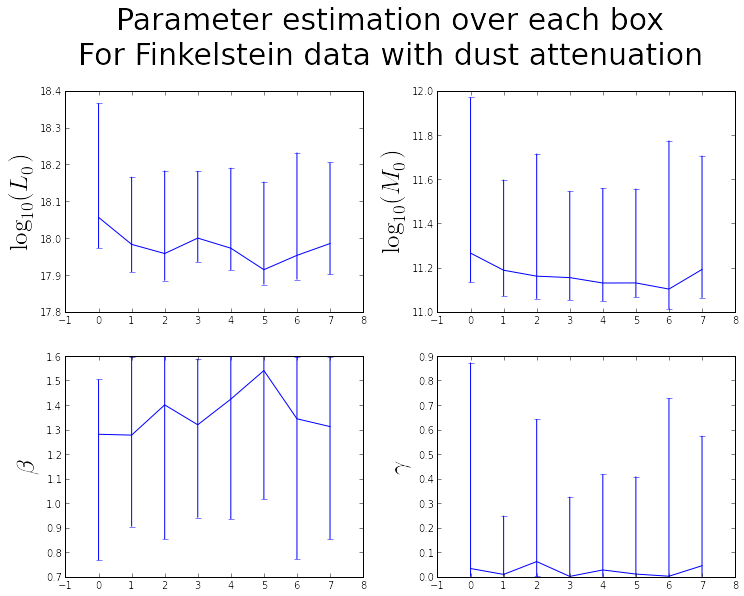

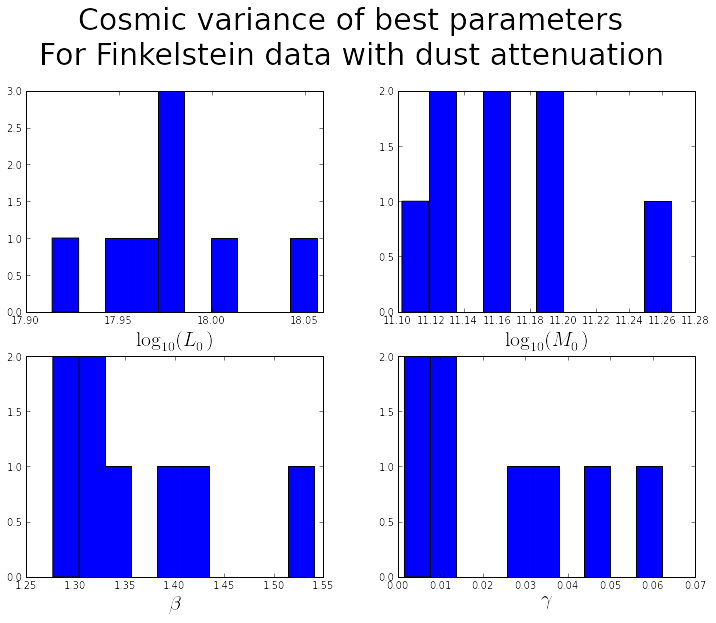

In [4]:
output = open('analysis/'+name+'/CosmicVariance_'+DustFile+'.dat' , 'w' )

filename = 'analysis/'+name+'/Best_Parameters_'+DustFile+'.dat'    
param = np.loadtxt(filename, delimiter=',', usecols=[0,1,2,3,4,5,6,7,8,9,10,11])

for k in range(4):
    output.write(str(LABELS[k])+', mean value = '+str(mean(param[:,3*k+0]))+', cosmic std dev='+str(std(param[:,3*k+0]))+
                 ', mean sigma per box ='+str(mean(sqrt(param[:,3*k+1]**2 + param[:,3*k+2]**2)))+'\n' )
output.close()


fig = figure(figsize=(12, 9))
suptitle('Parameter estimation over each box\nFor '+name2+' data '+DUST , fontsize=30)
fig.subplots_adjust(hspace=0.20, wspace=0.25,top=0.85, right=0.9, bottom=0.1)
ax1=fig.add_subplot(221); ax2=fig.add_subplot(222); ax3=fig.add_subplot(223); ax4=fig.add_subplot(224);
ax = [ax1,ax2,ax3,ax4]
for k in range(0,4):
    ax[k].errorbar(range(0,BOXES),param[:,3*k+0],yerr=[param[:,3*k+1],param[:,3*k+2]], ls='-', marker='')
    ax[k].set_ylabel(LABELS[k], fontsize=25)
    ax[k].set_xlim(-1,BOXES)
savefig('analysis/'+name+'/'+name+'_CosmicVar1_'+DustFile+'.pdf')

    
fig = figure(figsize=(12, 9))
suptitle('Cosmic variance of best parameters \nFor '+name2+' data '+DUST, fontsize=30)
fig.subplots_adjust(hspace=0.20, wspace=0.25,top=0.85, right=0.9, bottom=0.1)
ax1=fig.add_subplot(221); ax2=fig.add_subplot(222); ax3=fig.add_subplot(223); ax4=fig.add_subplot(224);
ax = [ax1,ax2,ax3,ax4]
for k in range(0,4):
    ax[k].hist(param[:,3*k+0])
    print str(LABELS[k]), 'mean = ', mean(param[:,3*k+0]), ', cosmic std =', std(param[:,3*k+0]), 'mean sigma per box =', mean(sqrt(param[:,3*k+1]**2 + param[:,3*k+2]**2))
    ax[k].set_xlabel(LABELS[k], fontsize=20)
savefig('analysis/'+name+'/'+name+'_CosmicVar2_'+DustFile+'.pdf')
